# **Regression Analysis of COVID 19**
# **Kieran Bissessar**

# **Part 1 - Present Analysis**

## 1. **Load the data** into a pandas dataframe.

In [1]:
# Importataion des bibliothèques nécessaires  
import pandas as pd;
import numpy  as np;
import scipy.integrate;
import matplotlib.pyplot as plt;
import copy;
from   sklearn.metrics       import mean_squared_error, mean_absolute_error;
from   sklearn.tree          import DecisionTreeRegressor;


In [5]:
df_orig = pd.read_csv("covid_19_data.csv", on_bad_lines = 'skip');
print(df_orig);
#print(df_orig.columns)

         SNo ObservationDate Province/State  Country/Region  \
0          1      01/22/2020          Anhui  Mainland China   
1          2      01/22/2020        Beijing  Mainland China   
2          3      01/22/2020      Chongqing  Mainland China   
3          4      01/22/2020         Fujian  Mainland China   
4          5      01/22/2020          Gansu  Mainland China   
...      ...             ...            ...             ...   
10666  10667      03/31/2020        Wyoming              US   
10667  10668      03/31/2020       Xinjiang  Mainland China   
10668  10669      03/31/2020          Yukon          Canada   
10669  10670      03/31/2020         Yunnan  Mainland China   
10670  10671      03/31/2020       Zhejiang  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  
0          1/22/2020 17:00        1.0     0.0        0.0  
1          1/22/2020 17:00       14.0     0.0        0.0  
2          1/22/2020 17:00        6.0     0.0        0.0  
3      

### Role: Charger les données dans un DataFrame pandas tout en ignorant les lignes mal formatées grâce à l’option on_bad_lines='skip'.

## 2. **new dataframe** which counts the **cumulative total**         number of cases, the cumulative total number of deaths, and also          cumulative total number of recoveries for each date.

In [21]:
df = copy.deepcopy(df_orig);
del df['Last Update'];
date_lst  = df.ObservationDate.unique();
date_dict = {}
#len(date_lst) # 70 dates
for i in range(len(date_lst)):
    df_temp = df.loc[df['ObservationDate'] == date_lst[i]];
    date_dict[date_lst[i]] = df_temp;
#print(date_dict)


### Role :
#### 1. Supprime la colonne Last Update pour simplifier l’analyse.
#### 2. Organise les données par date dans un dictionnaire date_dict.

In [22]:
date_tot_tup_dict = {};
for date, df in date_dict.items():
    tup_temp = (df['Confirmed'].sum(), df['Deaths'].sum(), df['Recovered'].sum())
    date_tot_tup_dict[date] = tup_temp;
#print(date_tot_tup_dict);
    

### Role : Calculer les totaux cumulés pour chaque date (cas confirmés, décès, récupérations).

In [23]:
df_date_tots = pd.DataFrame(date_tot_tup_dict);
df_date_tots = df_date_tots.transpose();
df_date_tots.columns = ['Confirmed', 'Deaths', 'Recovered'];
print(df_date_tots)

            Confirmed   Deaths  Recovered
01/22/2020      555.0     17.0       28.0
01/23/2020      653.0     18.0       30.0
01/24/2020      941.0     26.0       36.0
01/25/2020     1438.0     42.0       39.0
01/26/2020     2118.0     56.0       52.0
...               ...      ...        ...
03/27/2020   593291.0  27198.0   130915.0
03/28/2020   660706.0  30652.0   139415.0
03/29/2020   720117.0  33925.0   149082.0
03/30/2020   782365.0  37582.0   164566.0
03/31/2020   857487.0  42107.0   178034.0

[70 rows x 3 columns]


## 3. **Plot** the total number of cases per day over time and summarize your findings

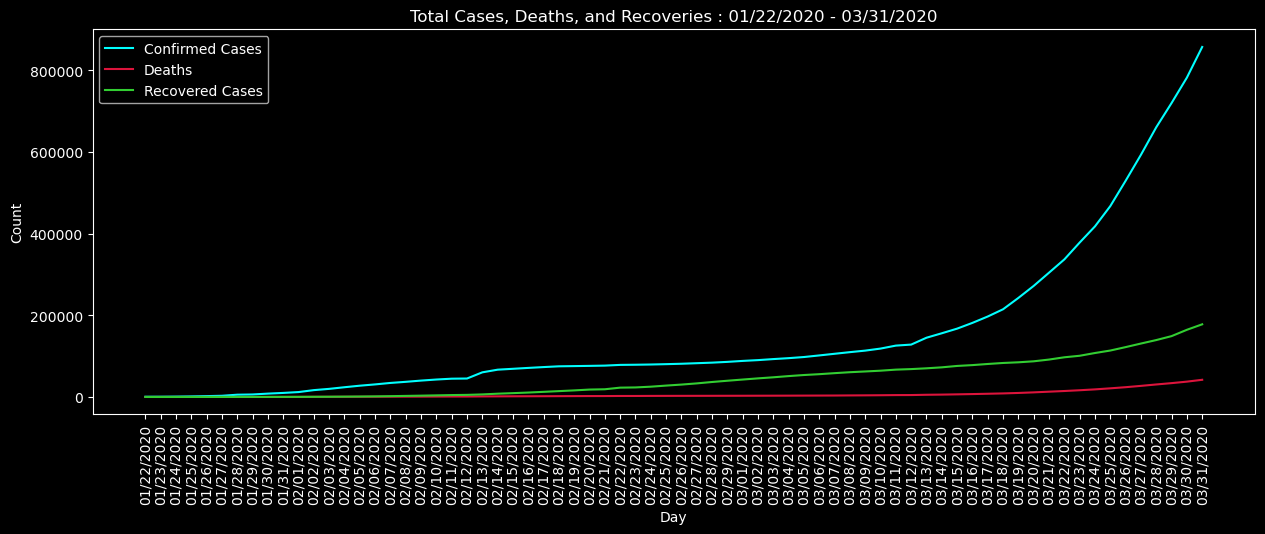

In [10]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
plt.plot(df_date_tots['Confirmed'], label = "Confirmed Cases", color = 'cyan')
plt.plot(df_date_tots['Deaths'], label    = "Deaths", color = 'crimson')
plt.plot(df_date_tots['Recovered'], label = "Recovered Cases", color = 'limegreen')
#plt.grid();
plt.legend();
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90);
start_date = str(date_lst[0]);
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Total Cases, Deaths, and Recoveries : " + start_date + " - " + fin_date);


### Role : Visualiser l’évolution temporelle des cas confirmés, décès et récupérations pour observer les tendances.

All of the three curves seem to be exponential (start of logistic curve). The confirmed cases was obviously higher than the deaths and recovered cases. Thankfully, the rate of the the recovered cases seems to be higher than that of the death curve.

## 4. Create a new column in the dataframe called **“closed cases”**

In [24]:
df_date_tots['Closed Cases'] = df_date_tots['Deaths'] + df_date_tots['Recovered'];
#print(df_date_tots)

## 5. Create a new column in the dataframe called “active cases”

In [25]:
df_date_tots['Active Cases'] = df_date_tots['Confirmed'] - df_date_tots['Closed Cases']

## 6. Create one **plot** showing the trend of number of active cases and closed cases 

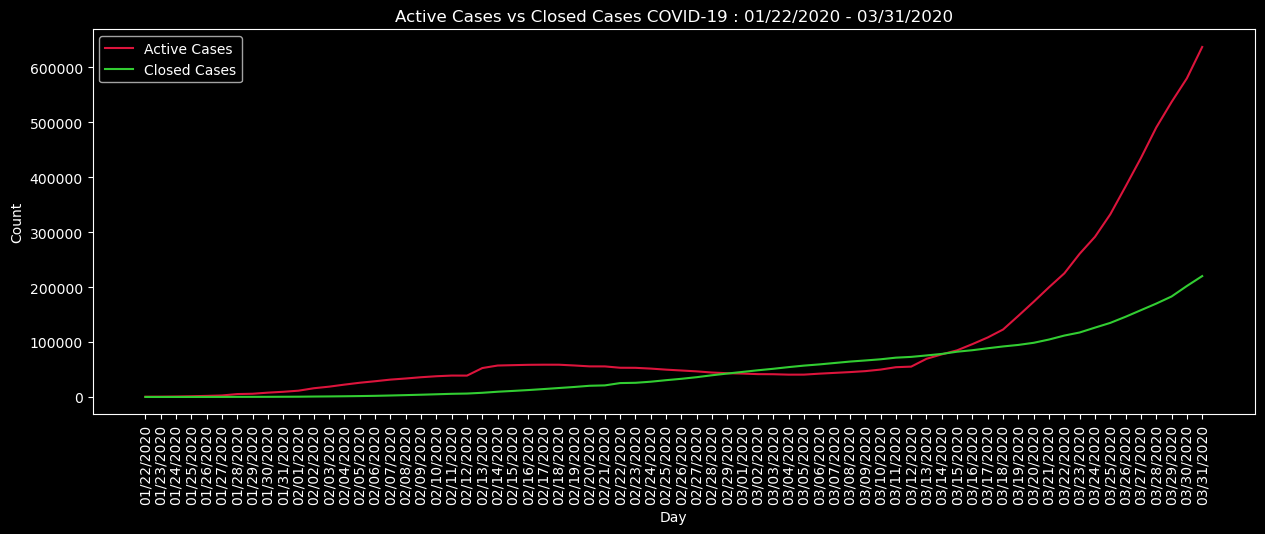

In [26]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
plt.plot(df_date_tots['Active Cases'], label = "Active Cases", color = 'crimson')
plt.plot(df_date_tots['Closed Cases'], label = "Closed Cases", color = 'limegreen')
#plt.grid();
plt.legend();
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90);
start_date = str(date_lst[0]);
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Active Cases vs Closed Cases COVID-19 : " + start_date + " - " + fin_date);

## 7. Growth Factor

The number of active cases is higher than the number of closed cases as of yet.

In [13]:
growth_len_lst = len(date_lst) - 1; # 69
confirmed_lst = df_date_tots["Confirmed"];
death_lst = df_date_tots["Deaths"];
recovered_lst = df_date_tots["Recovered"];
confGF_lst = []
deathsGF_lst = []
recovGF_lst = []
for i in range(growth_len_lst):
    confirmedGF = confirmed_lst[i+1] / confirmed_lst[i] ;
    confGF_lst.append(confirmedGF)
    deathGF = death_lst[i+1] / death_lst[i] ;
    deathsGF_lst.append(deathGF)
    recoveredGF = recovered_lst[i+1] / recovered_lst[i] ;
    recovGF_lst.append(recoveredGF);
#print(recovGF_lst)

### Role : Calculer l’évolution relative des cas confirmés, décès et récupérations pour détecter si les courbes suivent une tendance exponentielle.

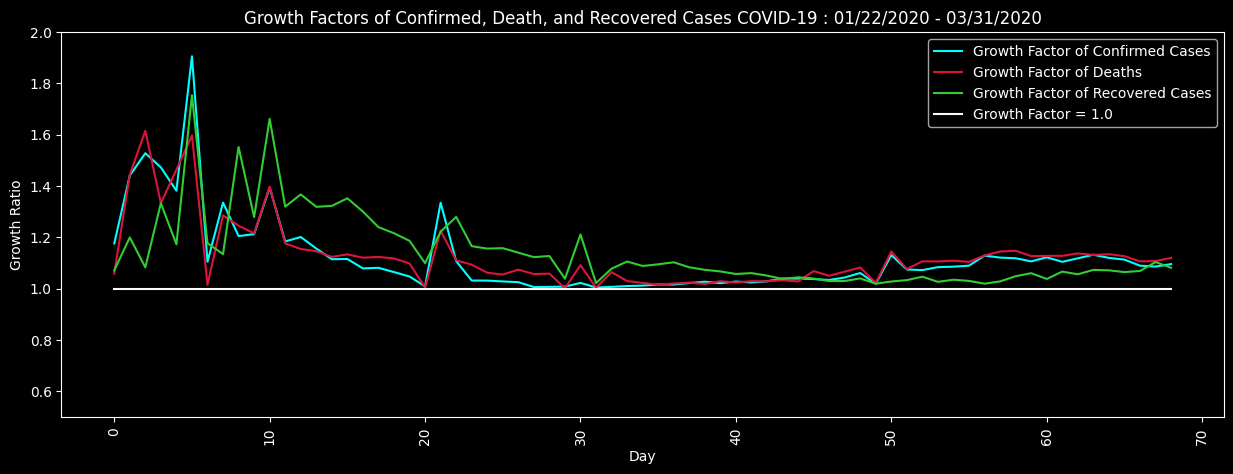

In [11]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
plt.plot(confGF_lst, label = "Growth Factor of Confirmed Cases", color = 'cyan')
plt.plot(deathsGF_lst, label = "Growth Factor of Deaths", color = 'crimson')
plt.plot(recovGF_lst, label = "Growth Factor of Recovered Cases", color = 'limegreen')
x = []
for i in range((growth_len_lst)):
    x.append(1);
plt.plot(x, label = "Growth Factor = 1.0", color = 'snow')
#plt.grid();
plt.legend();
plt.xlabel("Day")
plt.ylabel("Growth Ratio")
plt.ylim(.5,2)
plt.xticks(rotation = 90);
start_date = str(date_lst[0]);
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : " +
          start_date +
          " - " +
          fin_date);

## To make our data to be compatible with *sklearn* format, create a new column called “Days since” which tracks the number of days since the initial date.

## 8. Take the earliest 85% of the dates as **train** and the rest as **test**

In [36]:
days_since_lst = [];
for i in range(len(date_lst)):
    days_since_lst.append(i);
df_date_tots["Days Since:"] = days_since_lst;
df_date_tots = df_date_tots[["Days Since:", "Confirmed", "Deaths", "Recovered", "Active Cases", "Closed Cases"]];
#print(df_date_tots)

### Role:
#### 1. Ajouter une colonne Days Since pour indiquer les jours écoulés depuis la première date.
#### 2. Diviser les données en ensembles d’entraînement et de test tout en préservant l’ordre temporel grâce à shuffle=False.

In [98]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV;
from sklearn.preprocessing import StandardScaler;
#df_date_tots_cp = copy.deepcopy(df_date_tots);
#X = df_date_tots_cp.drop("Days Since:", axis = 1)

# -----------------------------------------------------------------
X = np.array(df_date_tots["Confirmed"])#.reshape(-1,1)
# X is the world cases array
y = np.array(days_since_lst).reshape(-1,1)
# y is the day count array associated with the world cases array
# -----------------------------------------------------------------


#len_train = (len(date_lst)*85)//100;
#len_test  = (len(date_lst) - len_train)

#X_train   =  X.iloc[:len_train];
#X_train = pd.Series(X_train)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(pd.DataFrame(X_train))

#y_train   =  y.iloc[:len_train];
#y_train = pd.Series(y_train)
#scaler = StandardScaler()
#y_train = scaler.fit_transform(pd.DataFrame(y_train))


#X_test    =  X.iloc[len_train-1:];
#X_test = pd.Series(X_test)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(pd.DataFrame(X_test))

#y_test    =  y.iloc[len_train-1:];
#y_test = pd.Series(y_test)
#scaler = StandardScaler()
#y_test = scaler.fit_transform(pd.DataFrame(y_test))

In [99]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.15,
                                                    shuffle = False)
# shuffle = False lets the data be split in order

## 9. Decision Tree

In [100]:
DT_reg = DecisionTreeRegressor(random_state=0);
DT_reg.fit(y_train, X_train);
y_test_DT_pred = DT_reg.predict(y_test);
y_DT_pred = DT_reg.predict(y);
#print(y_test_DT_pred)


### Role : Former un modèle d’arbre de décision avec les données d’entraînement (y_train, X_train) et prédire les cas confirmés pour les données de test.


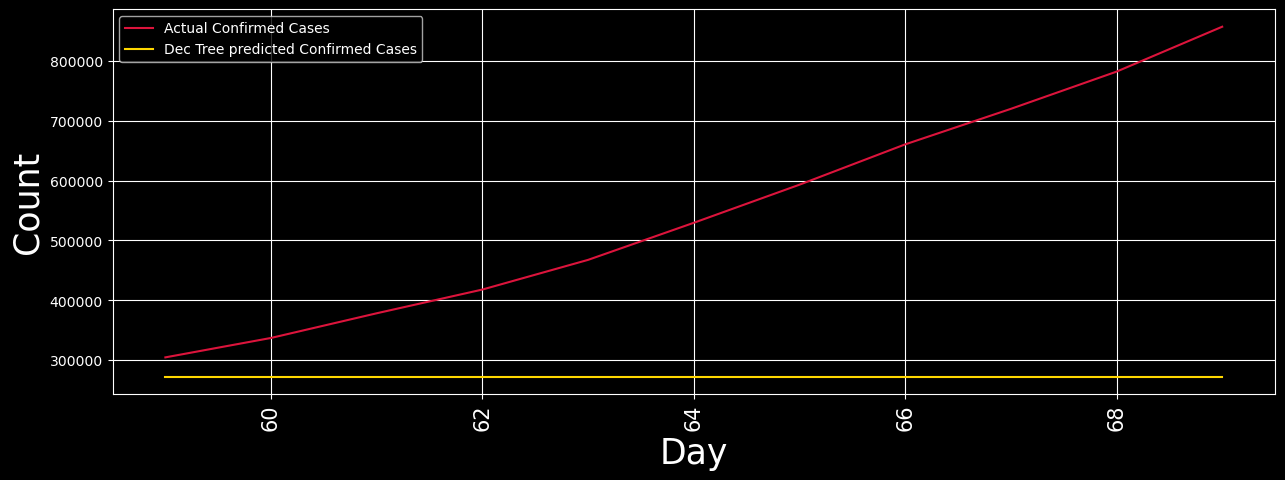

MAE: 277737.7272727273
MSE: 109079514439.72728


In [101]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);

# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Confirmed Cases",
         color = 'crimson')

# plotting the predicited values for the future days
plt.plot(y_test,
         y_test_DT_pred,
         label = "Dec Tree predicted Confirmed Cases",
         color = 'gold')

plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error(y_test_DT_pred, X_test))
print('MSE:',mean_squared_error(y_test_DT_pred, X_test))



#### Role : Évaluer les performances du modèle avec les métriques MAE (erreur absolue moyenne) et MSE (erreur quadratique moyenne).

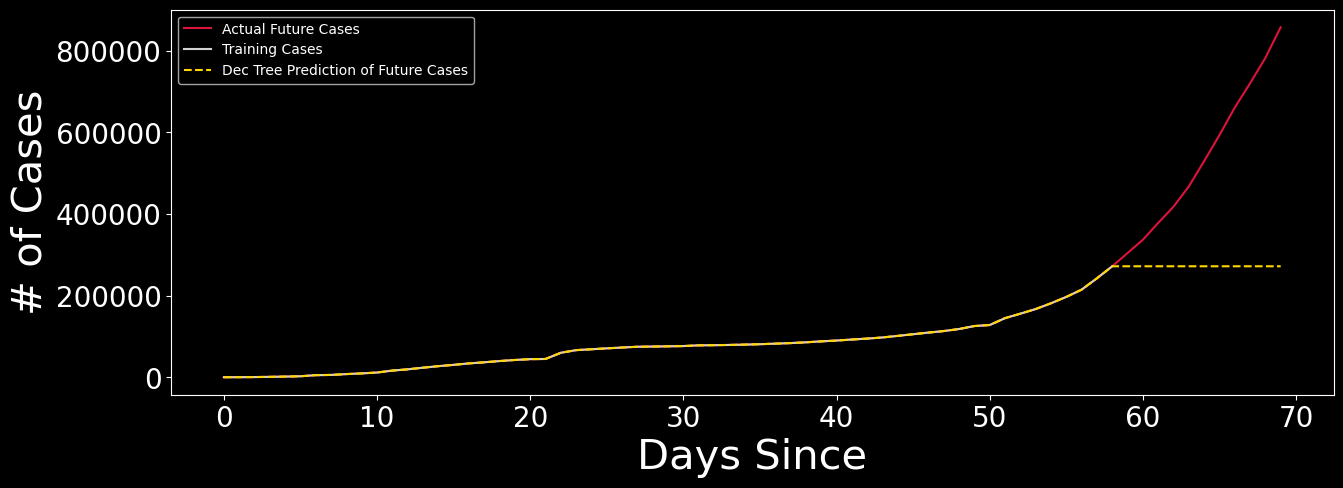

In [40]:
plt.figure(figsize=(15, 5))

plt.plot(y,
         X,
         label = 'Actual Future Cases',
         color = 'crimson')

plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')

plt.plot(y,
         y_DT_pred,
         label = 'Dec Tree Prediction of Future Cases',
         linestyle = "dashed",
         color = 'gold')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### 2. Expliquation des rôles des attributs, fonctions et codes :

on_bad_lines='skip' : Ignore les lignes problématiques lors du chargement des données.

deepcopy : Crée une copie indépendante du DataFrame, préservant l’original.

date_dict : Dictionnaire organisant les données par date.

date_tot_tup_dict : Dictionnaire stockant les totaux cumulés des cas confirmés, décès et récupérations par date.

style.use("dark_background") : Définit un style visuel pour les graphiques matplotlib.

xticks et yticks : Contrôlent les labels des axes X et Y dans les graphiques.

start_date et fin_date : Déterminent les dates de début et de fin pour l’analyse.

Boucle for dans Growth Factor :

Calcule l’évolution relative des cas d’un jour au suivant.

Ajoutez un print() dans la boucle pour observer les valeurs intermédiaires.

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Charger le dataset
data = pd.read_csv("covid_19_data.csv")



In [91]:
# 2. Exploration des données
print(data.head())
print(data.info())
print(data.describe())


   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  
<class 'pandas.core.frame.DataFrame'>
Index: 5712 entries, 0 to 10670
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              5712 non-null   int64  
 1   ObservationDate  5712 non-null   object 
 2   Province/State   5712 non-null   object 
 3   Country/Region

In [84]:

# 3. Prétraitement des données
# Supposons que nous prédisons "Confirmed" (nombre de cas confirmés) en fonction de certaines colonnes.
# Exemple : Features - ['Deaths', 'Recovered'], Target - ['Confirmed']

# Gestion des valeurs manquantes
data = data.dropna()

# Sélection des colonnes pertinentes
X = data[['Deaths', 'Recovered']]
y = data['Confirmed']


In [86]:

# 4. Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [87]:

# 5. Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [88]:

# 6. Prédictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [89]:

# 7. Calcul des métriques
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


In [93]:

# Affichage des résultats
print("Performance sur les données d'entraînement :")
print(f"MSE : {train_mse:.2f}, MAE : {train_mae:.2f}, R2 : {train_r2:.2f}")

print("\nPerformance sur les données de test :")
print(f"MSE : {test_mse:.2f}, MAE : {test_mae:.2f}, R2 : {test_r2:.2f}")

Performance sur les données d'entraînement :
MSE : 1372643.80, MAE : 407.00, R2 : 0.96

Performance sur les données de test :
MSE : 1329283.49, MAE : 406.70, R2 : 0.97
